# Imports

In [1]:
import torch
from torch import optim, nn
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
torch.manual_seed(42)

import sys
sys.path.append('..')
from unet import Unet
from unet import CustomDataset

# Params & Dataset

Note: Only 4 input target pairs are used to show overfitting over a small dataset. 

In [2]:
IMG_SHAPE = (64, 64)
X_PATH = "../data/train/"
Y_PATH = "../data/train_masks/"
X_TEST_PATH = "../data/manual_test/"
Y_TEST_PATH = "../data/manual_test_masks/"
MODEL_SAVE_PATH = "../weights/unet.pth"
FEATS = [32]

LEARNING_RATE = 1e-2
BATCH_SIZE = 1
EPOCHS = 30
device = "cuda" if torch.cuda.is_available() else "cpu"

transform = transforms.Compose([
    transforms.Resize(IMG_SHAPE),
    transforms.ToTensor()
    ])
train_dataset = CustomDataset(X_path=X_PATH, Y_path=Y_PATH, transform=transform)
generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset = random_split(train_dataset, [1, len(train_dataset)-1], generator=generator)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [3]:
len(train_dataset)

1

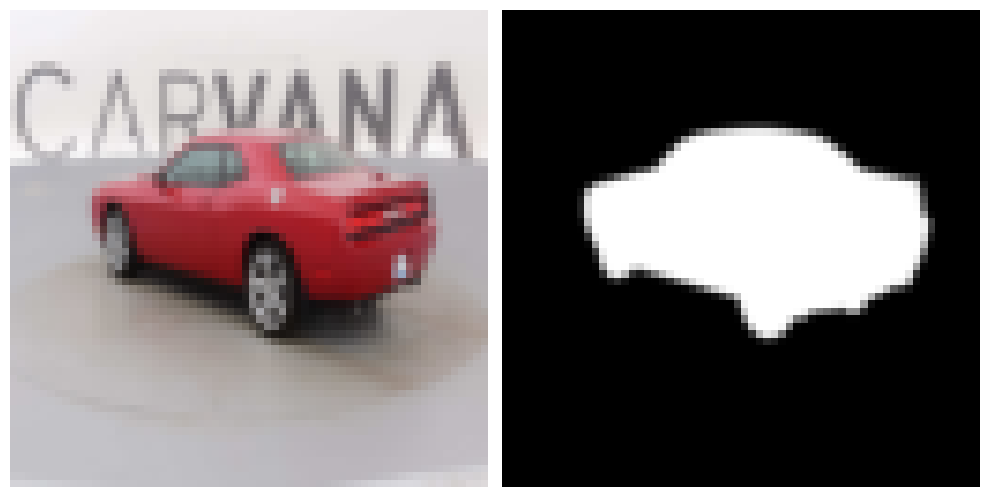

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 15))

image, mask = train_dataset[0]

image = np.transpose(image, (1, 2, 0))
mask = np.transpose(mask, (1, 2, 0))

axs[0].imshow(image)
axs[1].imshow(mask, cmap='gray')

axs[0].axis('off')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Model

In [5]:
model = Unet(in_channels=3, out_channels=1, feats=FEATS).to(device=device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

# Lets Train

We need to binarize with `mask = (mask>0.5).float()` for this training example to show overfitting.

In [6]:
model.train()
for epoch in tqdm(range(EPOCHS)):
    train_running_loss = 0
    for idx, img_mask in enumerate(tqdm(train_dataloader)):
        img, mask = img_mask
        mask = (mask>0.5).float().to(device)
        img = img.float().to(device)
        
        y_pred = model(img)

        optimizer.zero_grad()
        loss = criterion(y_pred, mask)
        train_running_loss += loss.item()

        loss.backward()
        optimizer.step()
    train_loss = train_running_loss / (idx+1)
    
    print(f"Ep:{epoch+1} Train_loss:{train_loss:.4f}")

100%|██████████| 1/1 [00:00<00:00, 13.10it/s]


Ep:1 Train_loss:0.6745


  7%|▋         | 2/30 [00:00<00:02, 12.03it/s]

Ep:2 Train_loss:0.4749


100%|██████████| 1/1 [00:00<00:00, 23.36it/s]


Ep:3 Train_loss:0.3493


100%|██████████| 1/1 [00:00<00:00, 23.27it/s]


Ep:4 Train_loss:0.3095


 17%|█▋        | 5/30 [00:00<00:01, 17.28it/s]

Ep:5 Train_loss:0.2773


100%|██████████| 1/1 [00:00<00:00, 24.53it/s]


Ep:6 Train_loss:0.2465


100%|██████████| 1/1 [00:00<00:00, 24.67it/s]


Ep:7 Train_loss:0.2194


 27%|██▋       | 8/30 [00:00<00:01, 19.89it/s]

Ep:8 Train_loss:0.1977


100%|██████████| 1/1 [00:00<00:00, 23.34it/s]


Ep:9 Train_loss:0.1707


100%|██████████| 1/1 [00:00<00:00, 25.17it/s]


Ep:10 Train_loss:0.1524


 37%|███▋      | 11/30 [00:00<00:00, 21.13it/s]

Ep:11 Train_loss:0.1334


100%|██████████| 1/1 [00:00<00:00, 21.56it/s]


Ep:12 Train_loss:0.1181


100%|██████████| 1/1 [00:00<00:00, 22.53it/s]


Ep:13 Train_loss:0.1037


 47%|████▋     | 14/30 [00:00<00:00, 18.91it/s]

Ep:14 Train_loss:0.0914


100%|██████████| 1/1 [00:00<00:00, 22.15it/s]


Ep:15 Train_loss:0.0810


100%|██████████| 1/1 [00:00<00:00, 22.81it/s]


Ep:16 Train_loss:0.0709


 57%|█████▋    | 17/30 [00:00<00:00, 19.65it/s]

Ep:17 Train_loss:0.0628


100%|██████████| 1/1 [00:00<00:00, 24.65it/s]


Ep:18 Train_loss:0.0554


100%|██████████| 1/1 [00:00<00:00, 23.54it/s]


Ep:19 Train_loss:0.0497


 67%|██████▋   | 20/30 [00:01<00:00, 20.42it/s]

Ep:20 Train_loss:0.0440


100%|██████████| 1/1 [00:00<00:00, 23.49it/s]


Ep:21 Train_loss:0.0402


100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


Ep:22 Train_loss:0.0355


 77%|███████▋  | 23/30 [00:01<00:00, 20.78it/s]

Ep:23 Train_loss:0.0329


100%|██████████| 1/1 [00:00<00:00, 23.37it/s]


Ep:24 Train_loss:0.0311


100%|██████████| 1/1 [00:00<00:00, 12.90it/s]


Ep:25 Train_loss:0.0275


 87%|████████▋ | 26/30 [00:01<00:00, 19.46it/s]

Ep:26 Train_loss:0.0246


100%|██████████| 1/1 [00:00<00:00, 23.50it/s]


Ep:27 Train_loss:0.0234


100%|██████████| 1/1 [00:00<00:00, 23.12it/s]


Ep:28 Train_loss:0.0224


 97%|█████████▋| 29/30 [00:01<00:00, 20.27it/s]

Ep:29 Train_loss:0.0217


100%|██████████| 30/30 [00:01<00:00, 19.17it/s]

Ep:30 Train_loss:0.0199


In [7]:
torch.save(model.state_dict(), MODEL_SAVE_PATH)

# Inference

In [8]:
model = Unet(in_channels=3, out_channels=1, feats=FEATS).to(device)
model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=torch.device(device)))
images = []
orig_masks = []
pred_masks = []

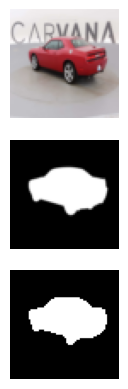

In [9]:
for img, orig_mask in train_dataset:
    img = img.float().to(device)
    img = img.unsqueeze(0)

    pred_mask = model(img)

    img = img.squeeze(0).cpu().detach()
    img = img.permute(1, 2, 0)

    pred_mask = pred_mask.squeeze(0).cpu().detach()
    pred_mask = pred_mask.permute(1, 2, 0)
    pred_mask[pred_mask < 0]=0
    pred_mask[pred_mask > 0]=1

    orig_mask = orig_mask.cpu().detach()
    orig_mask = orig_mask.permute(1, 2, 0)

    images.append(img)
    orig_masks.append(orig_mask)
    pred_masks.append(pred_mask)

images.extend(orig_masks)
images.extend(pred_masks)
fig = plt.figure()
for i in range(1, 3*len(train_dataset)+1):
    fig.add_subplot(3, len(train_dataset), i)
    plt.imshow(images[i-1], cmap="gray")
    plt.axis('off')
plt.show()